# Introduction

### Importing important libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

#importing drive to load dataset
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset

In [3]:
Dataset = pd.read_csv('/content/drive/MyDrive/TCC/train.csv')

In [4]:
Dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Shape of dataset

In [5]:
Dataset.shape

(159571, 8)

The dataset has 159,571 rows and 8 columns.

In [6]:
print('Columns present in dataset', Dataset.columns)

Columns present in dataset Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [7]:
Dataset.select_dtypes('int64', 'float64').columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [8]:
Dataset.select_dtypes('object').columns

Index(['id', 'comment_text'], dtype='object')

Numeric columns correspond to the toxicity labels (0/1), while comment_text is the main textual feature.

In [9]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(Dataset[labels].sum())

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


# Basis Analysis

In [10]:
Dataset.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


The dataset contains 159,571 comments with no missing text entries. So there is no need to handle missing values. Lets check for duplicate values

### Check duplicate values

In [12]:
duplicates = Dataset.duplicated().sum()
print('There is', duplicates, 'duplicate values present in the dataset')

There is 0 duplicate values present in the dataset


In [13]:
print(f"Percentage of duplicate rows: {(duplicates / Dataset.shape[0]) * 100:.2f}%")

Percentage of duplicate rows: 0.00%


### Check missing values

In [14]:
if (Dataset['comment_text'].isnull().sum()) == 0:
    print("There is no null value present in the dataset")
else:
    print("There is Null values present in the Dataset")

There is no null value present in the dataset


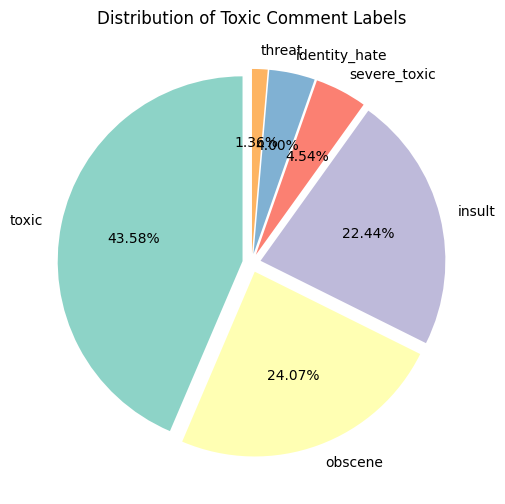

In [32]:
# Count of each label
labels_count = Dataset[labels].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    labels_count,
    labels=labels_count.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=plt.cm.Set3.colors,
    explode=[0.05]*len(labels)
)
plt.title("Distribution of Toxic Comment Labels")
plt.show()

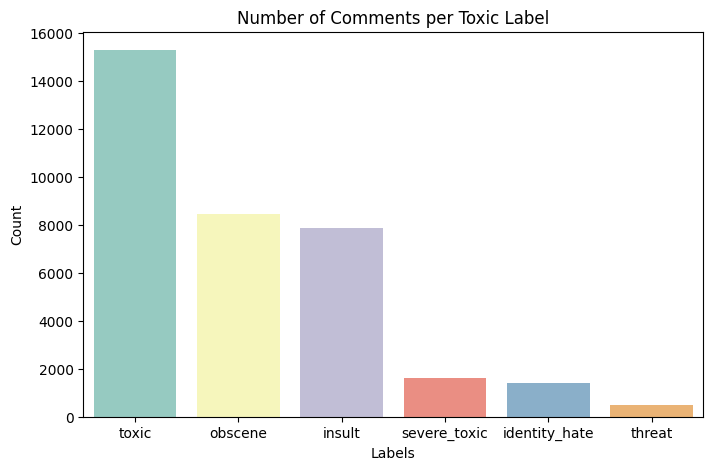

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=labels_count.index,
    y=labels_count.values,
    hue=labels_count.index,
    palette="Set3",
    dodge=False,  # overlap avoid
    legend=False
)
plt.title("Number of Comments per Toxic Label")
plt.ylabel("Count")
plt.xlabel("Labels")
plt.show()

### Summary of Dataset Introduction

This dataset comes from the **Kaggle Toxic Comment Classification Challenge**.  
It contains Wikipedia talk page comments labeled across six categories of toxicity:  *toxic, severe toxic, obscene, threat, insult, identity hate*.  

The dataset is **highly imbalanced**: most comments are non-toxic, and within toxic categories, *toxic*, *obscene*, and *insult* are more frequent, while *threat* and *identity_hate* are extremely rare.  